In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import datetime
import math

datos = pd.read_csv('delivery_dataset.csv',sep=';')

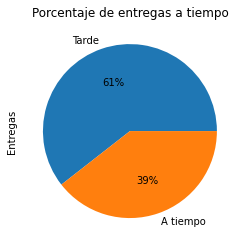

In [21]:
def entregas_a_tiempo_mes(year,month,datos):
    on_time = datos[datos.Year==year][datos.Month==month]['Delivery_Status'].dropna().value_counts()
    on_time.plot(kind='pie',title='Porcentaje de entregas a tiempo',labels=['Tarde','A tiempo'],ylabel='Entregas',autopct='%1.0f%%',)
    plt.savefig('primera.png')
    
entregas_a_tiempo_mes(2020,1,datos)

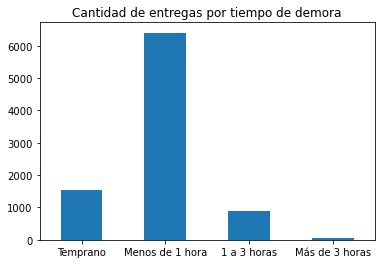

In [30]:
def demoras(year,month,datos):
    Shipment_Delay = datos[datos.Year==year][datos.Month==month]['Shipment_Delay'].dropna().value_counts()
    Shipment_Delay=pd.DataFrame(data=[Shipment_Delay[Shipment_Delay.index<0].sum(),Shipment_Delay.loc[(Shipment_Delay.index>=0) & (Shipment_Delay.index<=60)].sum(),Shipment_Delay.loc[(Shipment_Delay.index>=60) & (Shipment_Delay.index<=180)].sum(),Shipment_Delay[Shipment_Delay.index>180].sum()], index=['Temprano','Menos de 1 hora','1 a 3 horas','Más de 3 horas'])
    Shipment_Delay.plot(kind='bar',title='Cantidad de entregas por tiempo de demora',rot=0, legend=None)
    plt.savefig('segunda.png')
    
demoras(2020,1,datos)

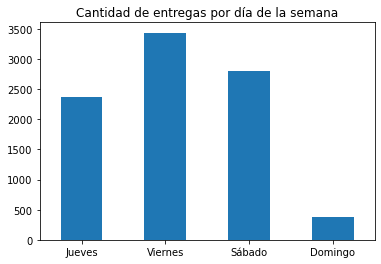

In [31]:
def entregas_por_dia_semana(year,month,datos):
    DayOfWeek = datos[datos.Year==year][datos.Month==month]['DayOfWeek'].value_counts().sort_index()
    indices = DayOfWeek.index.tolist()
    diassemana = ['Lunes','Martes','Miércoles','Jueves','Viernes','Sábado','Domingo']
    indices = [diassemana[i-1] for i in indices]
    DayOfWeek.index = indices
    DayOfWeek.plot(kind='bar',title='Cantidad de entregas por día de la semana',rot=0, legend=None)
    plt.savefig('tercera.png')

entregas_por_dia_semana(2020,1,datos)

In [4]:
def demora_promedio(year,month,datos):
    return datos['Shipment_Delay'].mean()

def distancia_prom(year,month,datos):
    return datos['Distance'].mean()

demora_promedio(2020,1,datos)

distancia_prom(2020,1,datos)

631.7245249472163

In [5]:
def source_mayor(year,month,datos):
    return datos['Source'].value_counts().nlargest(n=5)

def source_menor(year,month,datos):
    return datos['Source'].value_counts().nsmallest(n=5)
   
source_mayor(2020,1,datos)

source_menor(2020,1,datos)

CRP     9
HRL    20
IAD    23
JAN    26
GEG    31
Name: Source, dtype: int64

In [6]:
def destino_mayor(year,month,datos):
    return datos['Destination'].value_counts().nlargest(n=5)

def destino_menor(year,month,datos):
    return datos['Destination'].value_counts().nsmallest(n=5)

destino_mayor(2020,1,datos)

destino_menor(2020,1,datos)

CRP     9
JAN    20
AMA    23
HRL    23
MAF    26
Name: Destination, dtype: int64

In [7]:
datos['Carrier_Num'].value_counts().nlargest(n=5)
datos['Carrier_Num'].value_counts().nsmallest(n=100)

76      1
244     1
284     1
273     1
507     1
       ..
3837    1
3488    1
1227    1
2970    1
3750    1
Name: Carrier_Num, Length: 100, dtype: int64

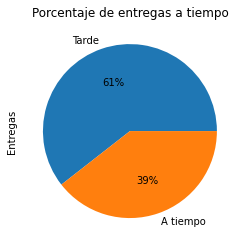

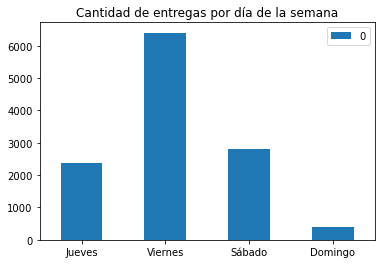

In [29]:
import re
import webbrowser
import os
import imgkit
def crear_reporte(year,month,datos):
    #Crear graficas y todos los datos
    entregas_a_tiempo_mes(year,month,datos)
    demoras(year,month,datos)
    entregas_por_dia_semana(year,month,datos)
    #generar reporte
    with open('Formato.html', 'r') as form:
        html = form.read()
    #se reemplazan todos los datos del html con los valores calculados
    meses = ['Enero','Febrero','Marzo','Abril','Mayo','Junio','Julio','Agosto','Septiembre','Octubre','Noviembre','Diciembre']
    html = re.sub('%mes%',meses[month],html)
    html = re.sub('%valor1%',f'{demora_promedio(year,month,datos):.1f} minutos',html)
    html = re.sub('%valor2%',f'{distancia_prom(year,month,datos):.1f} millas',html)
    
    #sources mas populares
    pandatemp = source_mayor(2020,1,datos)
    for i in range(0,5):
        html = re.sub(f'%ciudad{i+1}%',f'{pandatemp.index[i]}',html)
        html = re.sub(f'%ciudad{i+1}cant%',f'{pandatemp[i]}',html)
        
    #sources menos populares
    pandatemp = source_menor(2020,1,datos)
    for i in range(0,5):
        html = re.sub(f'%ciudad{i+6}%',f'{pandatemp.index[i]}',html)
        html = re.sub(f'%ciudad{i+6}cant%',f'{pandatemp[i]}',html)
        
    #destinos mas populares
    pandatemp = destino_mayor(2020,1,datos)
    for i in range(0,5):
        html = re.sub(f'%ciudad{i+11}%',f'{pandatemp.index[i]}',html)
        html = re.sub(f'%ciudad{i+11}cant%',f'{pandatemp[i]}',html)
    
    #destinos menos populares
    pandatemp = destino_menor(2020,1,datos)
    for i in range(0,5):
        html = re.sub(f'%ciudad{i+16}%',f'{pandatemp.index[i]}',html)
        html = re.sub(f'%ciudad{i+16}cant%',f'{pandatemp[i]}',html)
    
    temp = open('temp.html', 'w')
    temp.write(html)
    temp.close()
    archivo = 'file:///'+os.path.realpath('temp.html')
    webbrowser.open_new_tab(archivo)
crear_reporte(2020,1,datos)